# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the citipy Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 621


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code


In [3]:
# Set the API base URL
# url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}"
url = "https://api.openweathermap.org/data/2.5/weather?units=Metric&appid=" + weather_api_key
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
    # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | port elizabeth
Processing Record 3 of Set 1 | horta
Processing Record 4 of Set 1 | taiohae
City not found. Skipping...
Processing Record 5 of Set 1 | fort bragg
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | west island
Processing Record 8 of Set 1 | nova sintra
Processing Record 9 of Set 1 | puerto natales
Processing Record 10 of Set 1 | huedin
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | naze
Processing Record 14 of Set 1 | ormara
Processing Record 15 of Set 1 | cascais
Processing Record 16 of Set 1 | greymouth
Processing Record 17 of Set 1 | aksu
Processing Record 18 of Set 1 | edinburgh of the seven seas
Processing Record 19 of Set 1 | atafu village
Processing Record 20 of Set 1 | nemuro
Processing Record 21 of Set 1 | san fernando de apure
Process

Processing Record 36 of Set 4 | axim
Processing Record 37 of Set 4 | mar del plata
Processing Record 38 of Set 4 | kegen
Processing Record 39 of Set 4 | ellensburg
Processing Record 40 of Set 4 | mpika
Processing Record 41 of Set 4 | tual
Processing Record 42 of Set 4 | rosario oeste
Processing Record 43 of Set 4 | namibe
Processing Record 44 of Set 4 | port-gentil
Processing Record 45 of Set 4 | puerto ayacucho
Processing Record 46 of Set 4 | ajodhya
Processing Record 47 of Set 4 | saipan
Processing Record 48 of Set 4 | sitka
Processing Record 49 of Set 4 | syktyvkar
Processing Record 0 of Set 5 | khandyga
Processing Record 1 of Set 5 | petropavlovsk-kamchatsky
Processing Record 2 of Set 5 | santa cruz
Processing Record 3 of Set 5 | kingston
Processing Record 4 of Set 5 | okha
Processing Record 5 of Set 5 | katsuura
Processing Record 6 of Set 5 | nouadhibou
Processing Record 7 of Set 5 | ta`u
Processing Record 8 of Set 5 | maraba
Processing Record 9 of Set 5 | olinda
Processing Record

Processing Record 29 of Set 8 | orbetello
Processing Record 30 of Set 8 | rio grande
Processing Record 31 of Set 8 | ust-nera
Processing Record 32 of Set 8 | wafangdian
Processing Record 33 of Set 8 | safford
Processing Record 34 of Set 8 | akureyri
Processing Record 35 of Set 8 | harstad
Processing Record 36 of Set 8 | cambria
Processing Record 37 of Set 8 | constantia
Processing Record 38 of Set 8 | mantua
Processing Record 39 of Set 8 | acu
Processing Record 40 of Set 8 | lynden
Processing Record 41 of Set 8 | sao joao da barra
Processing Record 42 of Set 8 | whitefish
Processing Record 43 of Set 8 | champerico
Processing Record 44 of Set 8 | northam
Processing Record 45 of Set 8 | nelson bay
Processing Record 46 of Set 8 | yingshang chengguanzhen
Processing Record 47 of Set 8 | bender
Processing Record 48 of Set 8 | danville
Processing Record 49 of Set 8 | alta
Processing Record 0 of Set 9 | spirovo
Processing Record 1 of Set 9 | east london
Processing Record 2 of Set 9 | orkney
Pr

Processing Record 20 of Set 12 | abepura
Processing Record 21 of Set 12 | lautoka
Processing Record 22 of Set 12 | prince rupert
Processing Record 23 of Set 12 | mugumu
Processing Record 24 of Set 12 | tidjikja
Processing Record 25 of Set 12 | soc trang
Processing Record 26 of Set 12 | amga
Processing Record 27 of Set 12 | selfoss
Processing Record 28 of Set 12 | livingston
Processing Record 29 of Set 12 | el calafate
Processing Record 30 of Set 12 | manismata
Processing Record 31 of Set 12 | san luis de la loma
Processing Record 32 of Set 12 | vredendal
Processing Record 33 of Set 12 | blenheim
Processing Record 34 of Set 12 | kandahar
Processing Record 35 of Set 12 | mandan
Processing Record 36 of Set 12 | uturoa
Processing Record 37 of Set 12 | dalgopol
Processing Record 38 of Set 12 | hastings
Processing Record 39 of Set 12 | vernon
Processing Record 40 of Set 12 | najran
Processing Record 41 of Set 12 | tosontsengel
Processing Record 42 of Set 12 | onega
Processing Record 43 of Se

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          599
Lat           599
Lng           599
Max Temp      599
Humidity      599
Cloudiness    599
Wind Speed    599
Country       599
Date          599
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,3.76,91,100,14.74,TF,1702017213
1,port elizabeth,-33.9180,25.5701,21.16,73,20,13.38,ZA,1702017214
2,horta,38.5333,-28.6333,19.45,93,100,10.28,PT,1702017214
3,fort bragg,35.1390,-79.0060,4.90,77,0,0.00,US,1702017215
4,adamstown,-25.0660,-130.1015,22.61,80,100,3.89,PN,1702017216


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,3.76,91,100,14.74,TF,1702017213
1,port elizabeth,-33.9180,25.5701,21.16,73,20,13.38,ZA,1702017214
2,horta,38.5333,-28.6333,19.45,93,100,10.28,PT,1702017214
3,fort bragg,35.1390,-79.0060,4.90,77,0,0.00,US,1702017215
4,adamstown,-25.0660,-130.1015,22.61,80,100,3.89,PN,1702017216


In [8]:
city_data_df.count()

City          598
Lat           599
Lng           599
Max Temp      599
Humidity      599
Cloudiness    599
Wind Speed    599
Country       593
Date          599
dtype: int64

## Create the Scatter Plots Requested

### Latitude Vs. Temperature 

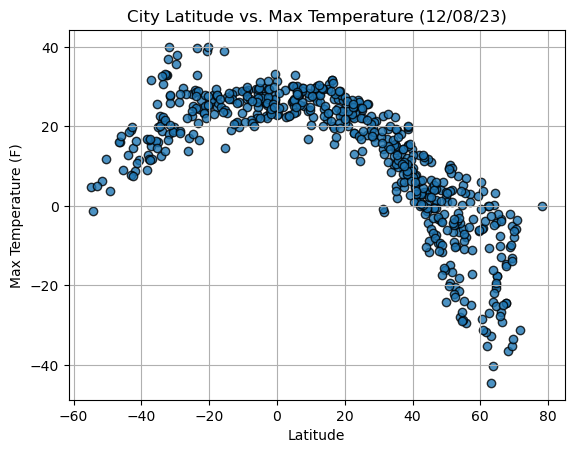

In [9]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Incorporate the other graph properties
# YOUR CODE HERE
plt.scatter(lats, max_temps, edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Max Temperature ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

### Latitude Vs. Humidity 

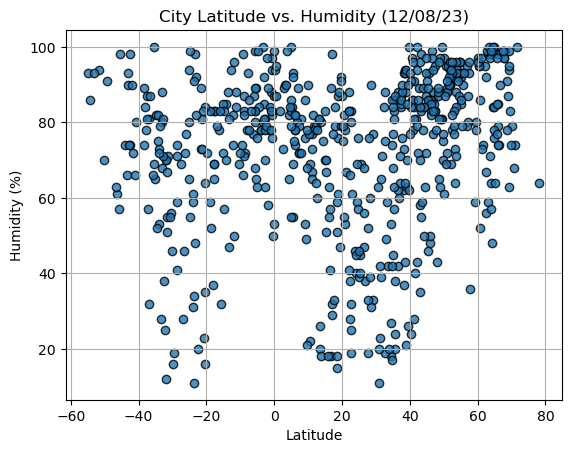

In [10]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE
plt.scatter(lats, humidity, edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Humidity ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

### Latitude Vs. Cloudiness


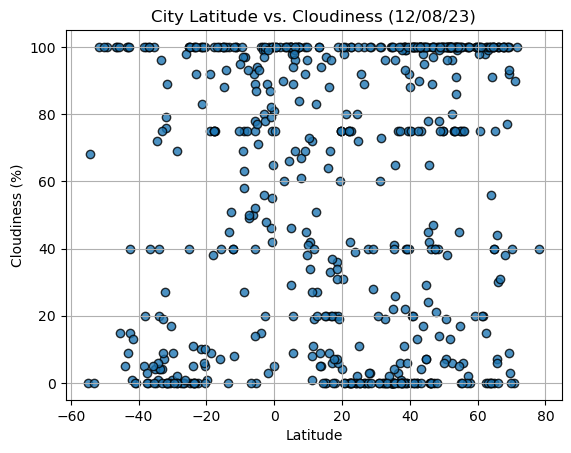

In [11]:
plt.scatter(lats, cloudiness, edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Cloudiness ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

### Latitude vs Wind Speed Plot

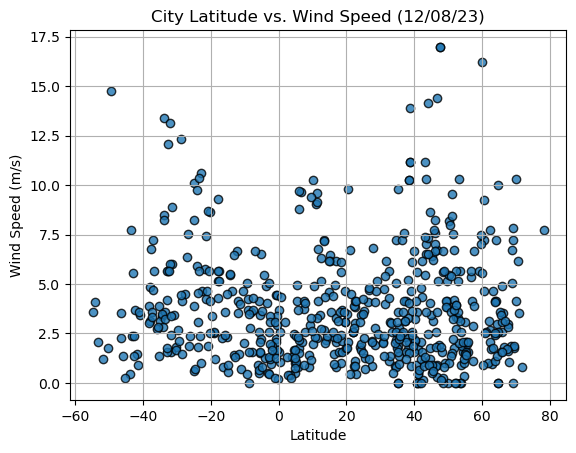

In [12]:
plt.scatter(lats, wind_speed, edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Wind Speed ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

## Requirement 2: Compute Linear Regression for Each Relationship 

In [13]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) > 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,horta,38.5333,-28.6333,19.45,93,100,10.28,PT,1702017214
3,fort bragg,35.1390,-79.0060,4.90,77,0,0.00,US,1702017215
6,nova sintra,14.8667,-24.7167,21.91,70,0,4.62,CV,1702017217
8,huedin,46.8667,23.0500,0.45,86,47,0.32,RO,1702017218
11,naze,28.3667,129.4833,19.51,60,3,2.76,JP,1702017219


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) < 0, :]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,3.76,91,100,14.74,TF,1702017213
1,port elizabeth,-33.9180,25.5701,21.16,73,20,13.38,ZA,1702017214
4,adamstown,-25.0660,-130.1015,22.61,80,100,3.89,PN,1702017216
5,west island,-12.1568,96.8225,28.99,74,40,6.69,CC,1702017216
7,puerto natales,-51.7236,-72.4875,6.24,94,100,1.20,CL,1702017114


### Temperature vs Latitude Linear Regression Plot

The r-value is -0.8712457544359552


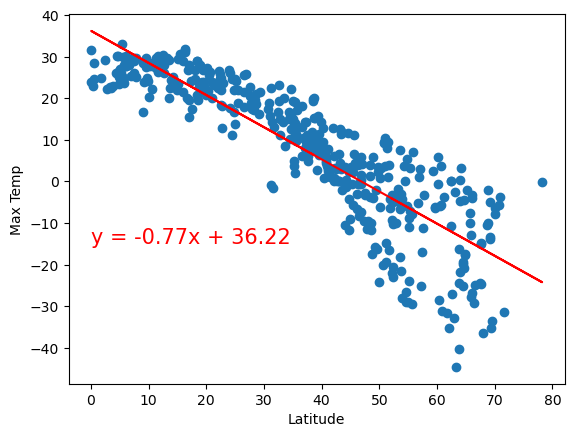

In [16]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(0,-15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'The r-value is {rvalue}')

The r-value is 0.5585320028362983


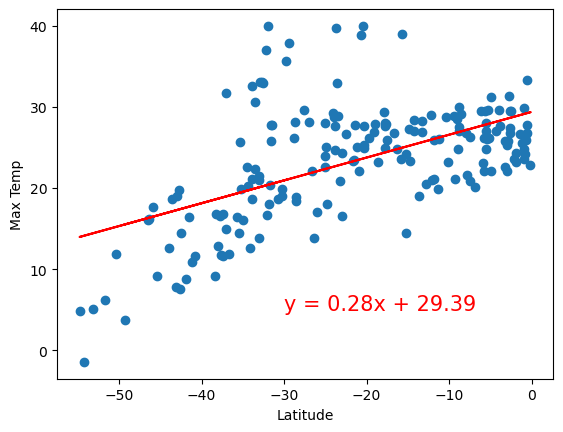

In [17]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-30,5),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'The r-value is {rvalue}')

#### Discussion about the linear relation: 
As one would expect there's an inverse relationship between Temperature and latitude. As the max temperature increases the the latitude decreases. Decreasing latitude conveys nearing the equator where the sun's light shines most directly. Conversley, there's a positive relationship between Temperature and latitude in the southern hemisphere. As temperature increases so does that of latitude as well. 

### Humidity vs Latitude Linear Regression Plot


The r-value is 0.3052303871407817


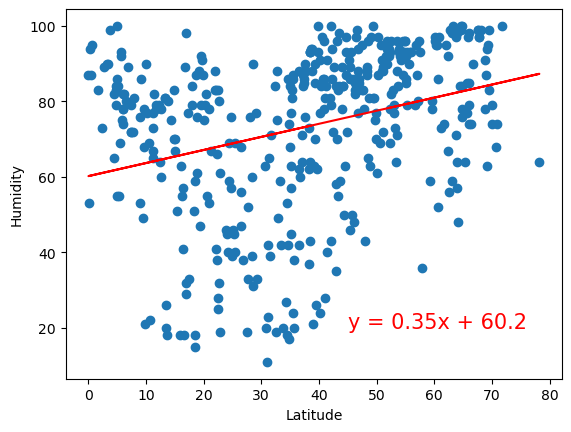

In [18]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The r-value is {rvalue}')

The r-value is 0.16372120844965157


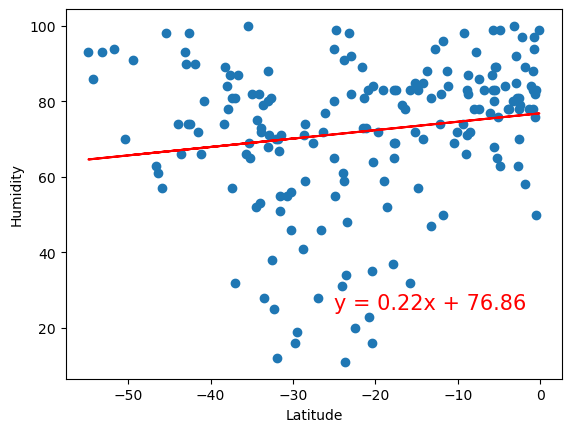

In [19]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The r-value is {rvalue}')

#### Discussion about the linear relation:
There is a positive relationship between humidity and latitude in both hemispheres, albeit slight. The fit of the line isn't very indicative a strong correlation between humidity and temperature, although one may argue that there's a better fit of the line in then southern hemisphere which again makes sense given the fact that latitude increases as we approach the equator.    

### Cloudiness vs Latitude Linear Regression Plot

The r-value is 0.09856759842227213


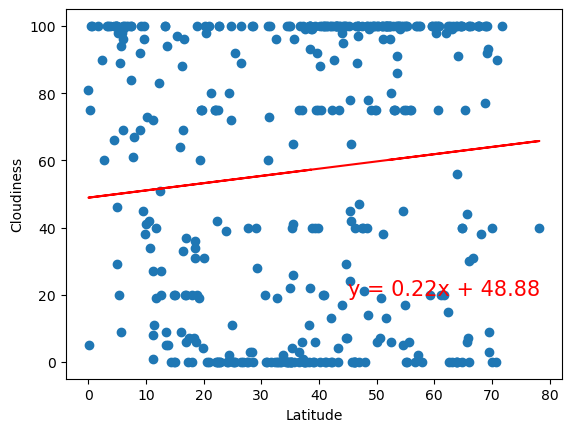

In [20]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}')

The r-value is 0.3079999566418757


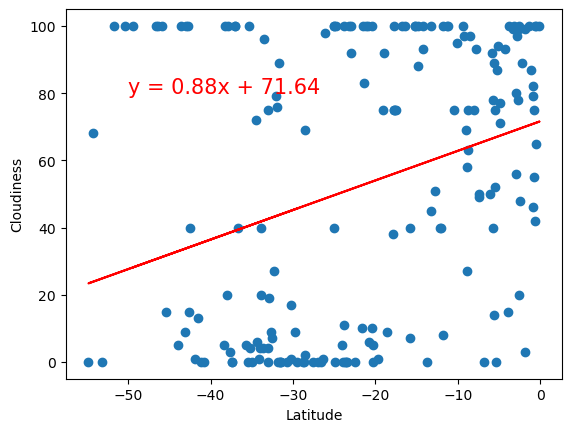

In [21]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}')

#### Discussion about the linear relation:
The fit of the line between cloudiness and latitude is essentially nonexistent and doesn't give indication that there is a correlation between the two. 


### Wind Speed vs Latitude Linear Regression Plot

The r-value is 0.06811392368598106


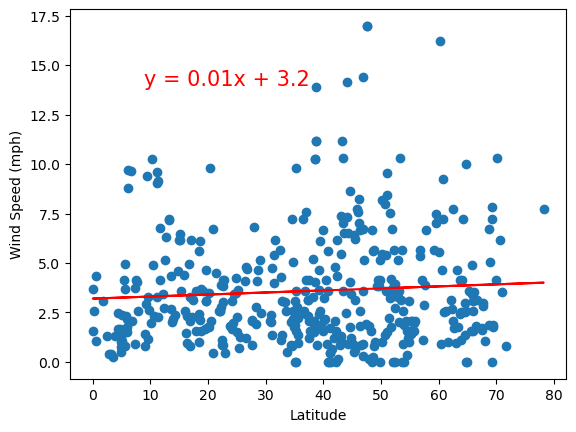

In [22]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(9,14),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f'The r-value is {rvalue}')

The r-value is -0.21625765994503335


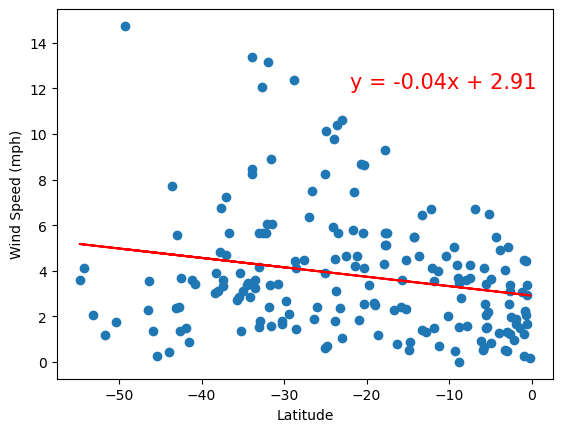

In [24]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-22,12),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f'The r-value is {rvalue}')

#### Discussion about the linear relation:
As was seen between cloudiness and latitude, wind speed and latitude doesn't give much indication of a correlation. 